In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib inline
import matplotlib.pylab as plt

In [31]:
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 5)

In [10]:
import ld_gan
from time import time
import numpy as np
from ld_gan.utils.model_handler import apply_model
import sklearn
from ld_gan.visualize import disp

In [3]:
X, Y = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)

100%|██████████| 102/102 [00:17<00:00, 11.27it/s]

load data from '/export/home/oblum/projects/ls_gan/data/flowers_102/jpg_128'


In [4]:
enc = ld_gan.utils.model_handler.load_model("xf_11111_s10l.py", 650, "enc")
gen = ld_gan.utils.model_handler.load_model("xf_11111_s10l.py", 650, "gen")
dis = ld_gan.utils.model_handler.load_model("xf_11111_s10l.py", 650, "dis")

/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.enc.Enc' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.gen.Gen' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


loaded model 'projects/xf_11111_s10l.py/model/e_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/g_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/d_0650.pth'


/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.dis.Dis' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
z_enc = apply_model(enc, X, 100)

In [6]:
z_anc = z_enc[:256]

In [7]:
def get_enc_space_suggestion(z_anchors, 
                             z_all, 
                             n_pos = 10,
                             n_neg = 10,
                             quantile_pos = 0.05, 
                             quantile_neg = 0.3):
    
    n_all = len(z_all)
    n_anc = len(z_anchors)
    n_pre_pos = int(quantile_pos * n_all)
    n_pre_neg = int((1.-quantile_neg) * n_all)
    
    # get distances in encoded space
    dists = sklearn.metrics.pairwise.pairwise_distances(z_anc, z_enc)
    idxs_sorted = np.array([d.argsort() for d in dists])
    
    # get indexes fullfilling quantile constraints
    idxs_pos = idxs_sorted[:, 1:n_pre_pos]
    idxs_neg = idxs_sorted[:, -n_pre_neg:]
    
    # random selection for suggestion
    idxs_pos = [i[np.random.randint(0, n_pre_pos-1, n_pos)] for i in idxs_pos]
    idxs_neg = [i[np.random.randint(0, n_pre_neg-1, n_neg)] for i in idxs_neg]
    idxs_pos = np.array(idxs_pos)
    idxs_neg = np.array(idxs_neg)
    
    return idxs_pos, idxs_neg

In [8]:
idxs_pos, idxs_neg = get_enc_space_suggestion(z_anc, z_enc)

In [12]:
idxs_pos.shape, idxs_neg.shape

((256, 10), (256, 10))

In [10]:
z_pos = z_enc[idxs_pos]
z_neg = z_enc[idxs_neg]

In [1]:
idxs_pos.shape

NameError: name 'idxs_pos' is not defined

In [26]:
np.concatenate([z_pos, z_neg], 1).shape

(256, 20, 256)

# pos distances

In [11]:
from sklearn.metrics.pairwise import pairwise_distances

In [14]:
dist_pos = [pairwise_distances(np.array([za]), z) for za, z in zip(z_anc, z_pos)]
dist_pos = np.squeeze(np.array(dist_pos))
dist_neg = [pairwise_distances(np.array([za]), z) for za, z in zip(z_anc, z_neg)]
dist_neg = np.squeeze(np.array(dist_neg))

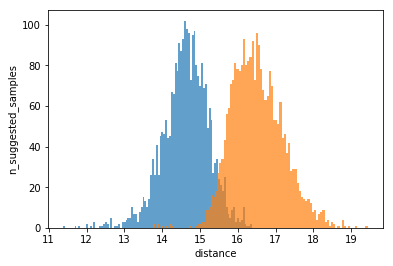

In [19]:
plt.figure()
plt.hist(dist_pos.flatten(), bins=100, alpha=0.7)
plt.hist(dist_neg.flatten(), bins=100, alpha=0.7)
plt.xlabel('distance')
plt.ylabel('n_suggested_samples')
plt.show()

# show nearest neighbor images

In [33]:
from ld_gan.train_ops.triplet_enc import get_enc_space_suggestion

In [37]:
idxs_pos, idxs_neg = get_enc_space_suggestion(z_anc,
                                              z_enc,
                                              quantile_pos=0.1,
                                              quantile_neg=0.3)

n_pre_pos:  818


In [38]:
imgs_pos = X[idxs_pos]
imgs_neg = X[idxs_neg]

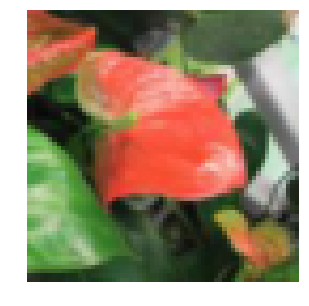

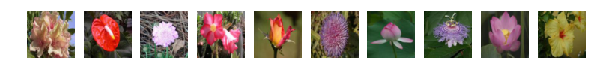

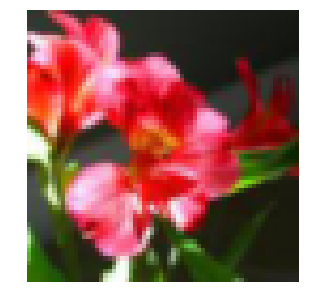

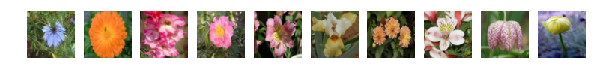

KeyboardInterrupt: 

In [39]:
for i in range(256):
    disp([X[i]])
    disp(imgs_pos[i])
    raw_input()